In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
%matplotlib inline

## データのpathをDataFrameにする
カラム：FilePathImage, FileName, FilePathMask

In [85]:
# globはワイルドカードを使ってファイル名を取得できる
glob('dataset/public-covid-data/rp_im/*')

['dataset/public-covid-data/rp_im/1.nii.gz',
 'dataset/public-covid-data/rp_im/2.nii.gz',
 'dataset/public-covid-data/rp_im/3.nii.gz',
 'dataset/public-covid-data/rp_im/4.nii.gz',
 'dataset/public-covid-data/rp_im/5.nii.gz',
 'dataset/public-covid-data/rp_im/6.nii.gz',
 'dataset/public-covid-data/rp_im/7.nii.gz',
 'dataset/public-covid-data/rp_im/8.nii.gz',
 'dataset/public-covid-data/rp_im/9.nii.gz']

In [86]:
# globの結果をsplitすることでfilenameを取得（リスト内包表記）
[p.split('/')[3] for p in glob('dataset/public-covid-data/rp_im/*')]

['1.nii.gz',
 '2.nii.gz',
 '3.nii.gz',
 '4.nii.gz',
 '5.nii.gz',
 '6.nii.gz',
 '7.nii.gz',
 '8.nii.gz',
 '9.nii.gz']

In [87]:
rp_im_df = pd.DataFrame({'FilePathImage': glob('dataset/public-covid-data/rp_im/*'),
    'FileName': [p.split('/')[-1] for p in glob('dataset/public-covid-data/rp_im/*')]})

In [88]:
# dataframeを作る
rp_im_df = pd.DataFrame({
    'FilePathImage': glob('dataset/public-covid-data/rp_im/*'),
    'FileName': [p.split('/')[-1] for p in glob('dataset/public-covid-data/rp_im/*')]})
rp_im_df

,FilePathImage,FileName
0,dataset/public-covid-data/rp_im/1.nii.gz,1.nii.gz
1,dataset/public-covid-data/rp_im/2.nii.gz,2.nii.gz
2,dataset/public-covid-data/rp_im/3.nii.gz,3.nii.gz
3,dataset/public-covid-data/rp_im/4.nii.gz,4.nii.gz
4,dataset/public-covid-data/rp_im/5.nii.gz,5.nii.gz
5,dataset/public-covid-data/rp_im/6.nii.gz,6.nii.gz
6,dataset/public-covid-data/rp_im/7.nii.gz,7.nii.gz
7,dataset/public-covid-data/rp_im/8.nii.gz,8.nii.gz
8,dataset/public-covid-data/rp_im/9.nii.gz,9.nii.gz


In [89]:
# mask版を作る
rp_msk_df = pd.DataFrame({
    'FilePathMask': glob('dataset/public-covid-data/rp_msk/*'),
    'FileName': [p.split('/')[-1] for p in glob('dataset/public-covid-data/rp_msk/*')]})
rp_msk_df

,FilePathMask,FileName
0,dataset/public-covid-data/rp_msk/1.nii.gz,1.nii.gz
1,dataset/public-covid-data/rp_msk/2.nii.gz,2.nii.gz
2,dataset/public-covid-data/rp_msk/3.nii.gz,3.nii.gz
3,dataset/public-covid-data/rp_msk/4.nii.gz,4.nii.gz
4,dataset/public-covid-data/rp_msk/5.nii.gz,5.nii.gz
5,dataset/public-covid-data/rp_msk/6.nii.gz,6.nii.gz
6,dataset/public-covid-data/rp_msk/7.nii.gz,7.nii.gz
7,dataset/public-covid-data/rp_msk/8.nii.gz,8.nii.gz
8,dataset/public-covid-data/rp_msk/9.nii.gz,9.nii.gz


In [90]:
# filenameをkeyにmerge
rp_im_df.merge(rp_msk_df, on='FileName')

,FilePathImage,FileName,FilePathMask
0,dataset/public-covid-data/rp_im/1.nii.gz,1.nii.gz,dataset/public-covid-data/rp_msk/1.nii.gz
1,dataset/public-covid-data/rp_im/2.nii.gz,2.nii.gz,dataset/public-covid-data/rp_msk/2.nii.gz
2,dataset/public-covid-data/rp_im/3.nii.gz,3.nii.gz,dataset/public-covid-data/rp_msk/3.nii.gz
3,dataset/public-covid-data/rp_im/4.nii.gz,4.nii.gz,dataset/public-covid-data/rp_msk/4.nii.gz
4,dataset/public-covid-data/rp_im/5.nii.gz,5.nii.gz,dataset/public-covid-data/rp_msk/5.nii.gz
5,dataset/public-covid-data/rp_im/6.nii.gz,6.nii.gz,dataset/public-covid-data/rp_msk/6.nii.gz
6,dataset/public-covid-data/rp_im/7.nii.gz,7.nii.gz,dataset/public-covid-data/rp_msk/7.nii.gz
7,dataset/public-covid-data/rp_im/8.nii.gz,8.nii.gz,dataset/public-covid-data/rp_msk/8.nii.gz
8,dataset/public-covid-data/rp_im/9.nii.gz,9.nii.gz,dataset/public-covid-data/rp_msk/9.nii.gz


### 関数化
やりたことはできたが、汚いため関数にして、juptylabはそれを実行するだけにするのが一般的

In [91]:
# 同じコードを編集していく
def get_df(basepath='dataset/public-covid-data', folder='rp_im'):
    data_dict = pd.DataFrame({
        'FilePath': glob('{}/{}/*'.format(basepath, folder)),
        'FileName': [p.split('/')[-1] for p in glob('{}/{}/*'.format(basepath, folder))]
    })
    return data_dict

def get_df_all(basepath='dataset/public-covid-data'):
    rp_im_df = get_df(basepath, 'rp_im')
    rp_msk_df = get_df(basepath, 'rp_msk')
    return rp_im_df.merge(rp_msk_df, on='FileName', suffixes=(('Image', 'Mask')))

In [92]:
get_df_all()

,FilePathImage,FileName,FilePathMask
0,dataset/public-covid-data/rp_im/1.nii.gz,1.nii.gz,dataset/public-covid-data/rp_msk/1.nii.gz
1,dataset/public-covid-data/rp_im/2.nii.gz,2.nii.gz,dataset/public-covid-data/rp_msk/2.nii.gz
2,dataset/public-covid-data/rp_im/3.nii.gz,3.nii.gz,dataset/public-covid-data/rp_msk/3.nii.gz
3,dataset/public-covid-data/rp_im/4.nii.gz,4.nii.gz,dataset/public-covid-data/rp_msk/4.nii.gz
4,dataset/public-covid-data/rp_im/5.nii.gz,5.nii.gz,dataset/public-covid-data/rp_msk/5.nii.gz
5,dataset/public-covid-data/rp_im/6.nii.gz,6.nii.gz,dataset/public-covid-data/rp_msk/6.nii.gz
6,dataset/public-covid-data/rp_im/7.nii.gz,7.nii.gz,dataset/public-covid-data/rp_msk/7.nii.gz
7,dataset/public-covid-data/rp_im/8.nii.gz,8.nii.gz,dataset/public-covid-data/rp_msk/8.nii.gz
8,dataset/public-covid-data/rp_im/9.nii.gz,9.nii.gz,dataset/public-covid-data/rp_msk/9.nii.gz


## 関数をpythonスクリプトにする
1. jupyterlabの左ペインの＋から、textfileを押下
2. Renameにてctvis.pyなどにする
3. Jupyterlabの方に戻り複数セルをマージしたい場合、洗濯して、Shift M
4. cmd+aで全選択肢、Cmf+cでコピーして2で作ったファイルへコピー
5. 2で作ったファイルにimport文を書く
6. そのスクリプト内でしか呼ばれない関数は_をつける（つけても呼べるが動作保証されていない）
7. jupyterlabでインポートして利用する

In [93]:
# 作ったファイルをインポートする
# スクリプトファイルを変更する可能性が高いのでオーとリロード
%load_ext autoreload
%autoreload 2
# この書き方をすると_のプライベートファンクションは呼べる
# 使う時は、ctvis.XXXXXX（関数名）
import ctvis
# この書き方をすると_のプライベートファンクションは呼べない。この使い方はあまりない。
# 使う時は、XXXXXX（関数名）
from ctvis import * # 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
df = ctvis.get_df_all()
df

,FilePathImage,FileName,FilePathMask
0,dataset/public-covid-data/rp_im/1.nii.gz,1.nii.gz,dataset/public-covid-data/rp_msk/1.nii.gz
1,dataset/public-covid-data/rp_im/2.nii.gz,2.nii.gz,dataset/public-covid-data/rp_msk/2.nii.gz
2,dataset/public-covid-data/rp_im/3.nii.gz,3.nii.gz,dataset/public-covid-data/rp_msk/3.nii.gz
3,dataset/public-covid-data/rp_im/4.nii.gz,4.nii.gz,dataset/public-covid-data/rp_msk/4.nii.gz
4,dataset/public-covid-data/rp_im/5.nii.gz,5.nii.gz,dataset/public-covid-data/rp_msk/5.nii.gz
5,dataset/public-covid-data/rp_im/6.nii.gz,6.nii.gz,dataset/public-covid-data/rp_msk/6.nii.gz
6,dataset/public-covid-data/rp_im/7.nii.gz,7.nii.gz,dataset/public-covid-data/rp_msk/7.nii.gz
7,dataset/public-covid-data/rp_im/8.nii.gz,8.nii.gz,dataset/public-covid-data/rp_msk/8.nii.gz
8,dataset/public-covid-data/rp_im/9.nii.gz,9.nii.gz,dataset/public-covid-data/rp_msk/9.nii.gz


## NIfTIデータをNumPy Arrayとしてロードする

In [99]:
sample_path = df['FilePathImage'].iloc[0]
nifti = nib.load(sample_path)
data = nifti.get_fdata()

(630, 630, 45)

In [101]:
# このままだと(w, h, z)　※横になっている
data.shape

(630, 630, 45)

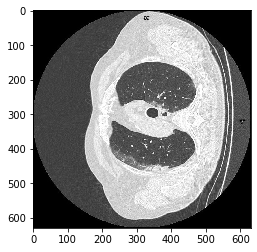

In [100]:
plt.imshow(data[:, :, 10], cmap='gray')

## np.rollaxis()
transport以外のやり方で縦横を変える

In [102]:
a = np.ones((4, 3, 2))

In [103]:
a.shape

(4, 3, 2)

In [105]:
# (4,3,2)のaxis=1(3)をstartに指定したaxis(4)の前に入れる
b = np.rollaxis(a, axis=1, start=0)
b.shape

(3, 4, 2)

In [110]:
# CV画像でやってみる
data_rolled = np.rollaxis(data, axis=1, start=0)

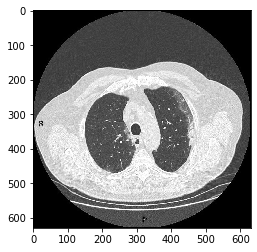

In [109]:
plt.imshow(data_rolled[:, :, 10], cmap='gray')

## マスクデータをRGBにする

In [114]:
p = df['FilePathMask'].iloc[0]
seg_data = ctvis.load_nifti(p)
seg_data.shape

(630, 630, 45)

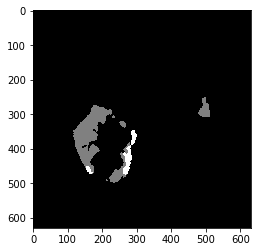

In [115]:
# これで出る色はmatplotlibが付けているデータ
plt.imshow(seg_data[:, :, 30], cmap='gray')

## マスクデータをRGBに変換する
マスクデータは0, 1, 2で意味のあるデータになっている
これに以下のように3次元配列（RGB）に置き換えて色をつける
- 0->黒（R:0, G:0, B:0）
- 1->赤（R:255, G:0, B:0）
- 2->緑（R:0, G:255, B:0）
- 3->青（R:0, G:0, B:255）

In [118]:
# まずはすべて0の箱を作ってから入れていく
# ctデータは3次元でそこに色データを持つ4次元のデータになる
shp = seg_data.shape
seg_color = np.zeros((shp[0], shp[1], shp[2], 3))
seg_color.shape

(630, 630, 45, 3)

In [132]:
# seg_dataが1のところはTrueにするフィルタ
filter_array = np.where(seg_data==1, True, False)

In [133]:
seg_color[filter_array] = [255, 0, 0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


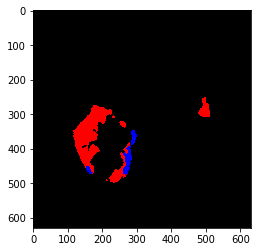

In [134]:
plt.imshow(seg_color[:, :, 30])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


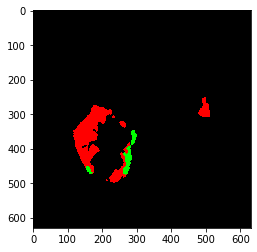

In [135]:
# whereではなくequalでも可能
# こちらの方がすっきりするが、whereはイコール以外にも条件指定ができる
filter_array = np.equal(seg_data, 2)
seg_color[filter_array] = [0, 255, 0]
plt.imshow(seg_color[:, :, 30])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


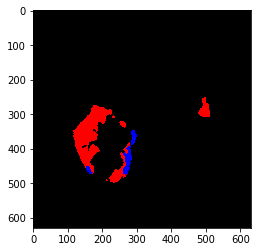

In [136]:
# where, equal以外
filter_color = np.equal(seg_data, 3)
seg_color[filter_array] = [0, 0, 255]
plt.imshow(seg_color[:, :, 30])

# CTデータをHUからグレースケールに変換する

In [ ]:
volume = ctvis.lad_nifti(df.loc[0]['Fil'])